In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url='https://www.pagina12.com.ar'

In [3]:
p12=requests.get(url)

In [4]:
p12.status_code

200

In [5]:
#p12.text

In [6]:
p12.headers

{'Date': 'Thu, 24 Aug 2023 15:07:03 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'x-etag': 'W/"7f2e2-tm1+wuzlJATaZ7QDVlpoC5I3TRU"', 'x-backend': 'frontend', 'x-type': 'Dynamic URI', 'x-backend-ttl': '120.000', 'Age': '39', 'grace': '86400.000 none', 'ttl': '80.878', 'x-instance': 'cache-front-prod-varnish-779f5667bd-mnjfl', 'x-restarts': '0', 'x-cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7fbc80b0eb80dac5-MIA', 'Content-Encoding': 'gzip'}

In [7]:
p12.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [8]:
p12.request.method

'GET'

In [9]:
p12.request.url

'https://www.pagina12.com.ar/'

In [10]:
s=BeautifulSoup(p12.text,'lxml')
type(s)

bs4.BeautifulSoup

In [11]:
print(s.prettify())

<!-- DUST PATH: /usr/src/app/src/templates/home.dust/ -->
<!-- DUST PATH: /usr/src/app/src/templates/p12_layout.dust/ -->
<!DOCTYPE html>
<html class="no-js" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página | 12: La otra mirada sobre Argentina y el mundo
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <link href="https://www.pagina12.com.ar" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página|12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Información sobre Argentina y el mundo. Noticias en fotos y vide

In [12]:
secciones=s.find('ul',attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
secciones

[<li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/ciencia">Ciencia</a></li>]

In [13]:
seccion=secciones[0]
seccion.a.get_text()

'El país'

In [14]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [15]:
links_secciones=[seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/ciencia']

In [16]:
sec=requests.get(links_secciones[0])
sec

<Response [200]>

In [17]:
s_seccion=BeautifulSoup(sec.text,'lxml')
#print(s_seccion.prettify())

In [18]:
featured_article=s_seccion.find('div',attrs={'class':'article-item__content-footer-wrapper gutter-small deco-bar-here-left'}).find_all('p')
featured_article

[<p class="title is-display-inline ff-22px-ls-07"><a class="p12-separator--left--primary" href="/581646-diputados-la-oposicion-logro-media-sancion-y-le-dio-un-reves">Quórum apretado y negociaciones contra reloj</a></p>,
 <p class="title is-display-inline ff-22px-ls-07"><a class="p12-separator--left--primary" href="/581658-la-mirada-de-referentes-barriales-sobre-los-asaltos-en-el-co">"Son hechos de magnitud marginal, más que populares"</a></p>,
 <p class="title is-display-inline ff-22px-ls-07"><a class="p12-separator--left--primary" href="/581662-ley-de-alquileres-la-reforma-va-a-generar-un-golpe-enorme-a-">Protesta de inquilinos frente al Congreso</a></p>,
 <p class="title is-display-inline ff-22px-ls-07"><a class="p12-separator--left--primary" href="/581666-la-podadora-de-jorge-macri-y-el-futuro-incierto-del-radicali">Renuncias y acusaciones cruzadas en CABA luego de la interna de Juntos por el Cambio</a></p>,
 <p class="title is-display-inline ff-22px-ls-07"><a class="p12-separator--

In [19]:
#links_secciones=[seccion.a.get('href') for seccion in secciones]
#links_secciones

article_list=[articulo.a.get('href') for articulo in featured_article]

In [20]:
article_list

['/581646-diputados-la-oposicion-logro-media-sancion-y-le-dio-un-reves',
 '/581658-la-mirada-de-referentes-barriales-sobre-los-asaltos-en-el-co',
 '/581662-ley-de-alquileres-la-reforma-va-a-generar-un-golpe-enorme-a-',
 '/581666-la-podadora-de-jorge-macri-y-el-futuro-incierto-del-radicali',
 '/581674-los-saqueos-que-sonaron-a-profecia-autocumplida',
 '/581457-casacion-confirmo-el-procesamiento-del-exgerente-de-producci',
 '/581676-milei-colaborativo',
 '/581459-la-puerta-que-abrio-milei-denuncian-un-ataque-a-investigador']

In [21]:
#article-item__content

def obtener_links(soup):
    '''Función que recibe un objeto de BeatiFulSoup de una página de una sección
    y devuelve una lista de URLs a las notas de esa sección
    '''
    lista_notas = []

    #Obtengo el articulo promocionado
    featured_article= soup.find('div', attrs={'class': 'article-item__header deco-bar-here'})
    if featured_article:
        url_art= url+featured_article.a.get('href')
        lista_notas.append(url_art)
        

    #obtengo el listado de artículos
    article_list= soup.find_all('div',attrs={'class': 'articles-list'})
    article_list
    for articles in article_list:
        for article in articles.find_all('div', attrs={'class': 'article-item__content'}):
            if article.a:
                url_art= url+article.a.get('href')
                lista_notas.append(url_art)

    return lista_notas

In [22]:
lista_notas=obtener_links(s_seccion)

In [23]:
lista_notas

['https://www.pagina12.com.ar/581782-patricia-bullrich-con-las-anteojeras-ideologicas-contra-los-',
 'https://www.pagina12.com.ar/581776-que-es-el-grupo-brics-que-paises-lo-conforman-y-como-puede-a',
 'https://www.pagina12.com.ar/581761-elecciones-argentina-2023-candidatos-calendario-resultados-y',
 'https://www.pagina12.com.ar/581646-diputados-la-oposicion-logro-media-sancion-y-le-dio-un-reves',
 'https://www.pagina12.com.ar/581658-la-mirada-de-referentes-barriales-sobre-los-asaltos-en-el-co',
 'https://www.pagina12.com.ar/581662-ley-de-alquileres-la-reforma-va-a-generar-un-golpe-enorme-a-',
 'https://www.pagina12.com.ar/581666-la-podadora-de-jorge-macri-y-el-futuro-incierto-del-radicali',
 'https://www.pagina12.com.ar/581674-los-saqueos-que-sonaron-a-profecia-autocumplida',
 'https://www.pagina12.com.ar/581457-casacion-confirmo-el-procesamiento-del-exgerente-de-producci',
 'https://www.pagina12.com.ar/581676-milei-colaborativo',
 'https://www.pagina12.com.ar/581459-la-puerta-que-abri

In [31]:
def obtener_texto(soup):
    '''Función que recibe un objeto de BeatiFulSoup de una página de una sección
    y devuelve una lista de URLs a las notas de esa sección
    '''
    lista_texto = []

    #Obtengo el articulo promocionado
    featured_article= soup.find('div', attrs={'class': 'article-item__content'})
    if featured_article:
        texto=featured_article.a.get_text()
        lista_texto.append(texto)
        

    #obtengo el listado de artículos
    article_list= soup.find_all('div',attrs={'class': 'articles-list'})
    article_list
    for articles in article_list:
        for article in articles.find_all('div', attrs={'class': 'article-item__content'}):
            if article.a:
                texto=article.a.get_text()
                lista_texto.append(texto)

    return lista_texto

In [32]:
lista_titulos=obtener_texto(s_seccion)
lista_titulos

['Patricia Bullrich, con las anteojeras ideológicas contra los Brics\xa0\xa0',
 'Qué es el grupo BRICS, qué países lo conforman y cómo puede ayudar a Argentina',
 'Elecciones Argentina 2023: candidatos, calendario, resultados y campañas, minuto a minuto\xa0 \xa0',
 'Diputados: La oposición logró media sanción y le dio un revés a la Ley de Alquileres',
 'La mirada de referentes barriales sobre los asaltos en el conurbano bonaerense',
 'Ley de Alquileres: "La reforma va a generar un golpe enorme a los salarios"',
 'La podadora de Jorge Macri y el futuro incierto del radicalismo porteño',
 'Los saqueos que sonaron a profecía autocumplida',
 'Casación confirmó el procesamiento del exgerente de Producción de Mercedes Benz por secuestros en la dictadura',
 'Milei, "colaborativo"',
 'La puerta que abrió Milei: denuncian un ataque a investigadoras del Conicet']

In [34]:
data = {'Texto': lista_titulos, 'Enlace': lista_notas}
df = pd.DataFrame(data)

In [35]:
df

,Texto,Enlace
0,"Patricia Bullrich, con las anteojeras ideológi...",https://www.pagina12.com.ar/581782-patricia-bu...
1,"Qué es el grupo BRICS, qué países lo conforman...",https://www.pagina12.com.ar/581776-que-es-el-g...
2,"Elecciones Argentina 2023: candidatos, calenda...",https://www.pagina12.com.ar/581761-elecciones-...
3,Diputados: La oposición logró media sanción y ...,https://www.pagina12.com.ar/581646-diputados-l...
4,La mirada de referentes barriales sobre los as...,https://www.pagina12.com.ar/581658-la-mirada-d...
5,"Ley de Alquileres: ""La reforma va a generar un...",https://www.pagina12.com.ar/581662-ley-de-alqu...
6,La podadora de Jorge Macri y el futuro inciert...,https://www.pagina12.com.ar/581666-la-podadora...
7,Los saqueos que sonaron a profecía autocumplida,https://www.pagina12.com.ar/581674-los-saqueos...
8,Casación confirmó el procesamiento del exgeren...,https://www.pagina12.com.ar/581457-casacion-co...
9,"Milei, ""colaborativo""",https://www.pagina12.com.ar/581676-milei-colab...


In [36]:
def obtener_texto_y_links(soup):
    '''Función que recibe un objeto de BeautifulSoup de una página de una sección
    y devuelve una lista de textos y una lista de URLs a las notas de esa sección
    '''
    lista_texto = []
    lista_notas = []

    # Obtengo el artículo promocionado
    featured_article_text = soup.find('div', attrs={'class': 'article-item__content'})
    if featured_article_text:
        texto = featured_article_text.a.get_text()
        lista_texto.append(texto)
        featured_article_link = url + featured_article_text.a.get('href')
        lista_notas.append(featured_article_link)

    # Obtengo el listado de artículos
    article_list = soup.find_all('div', attrs={'class': 'articles-list'})
    for articles in article_list:
        for article in articles.find_all('div', attrs={'class': 'article-item__content'}):
            if article.a:
                texto = article.a.get_text()
                lista_texto.append(texto)
                url_art = url + article.a.get('href')
                lista_notas.append(url_art)

    return lista_texto, lista_notas

In [26]:
url_mala=url.replace('2','3')

try:
    requests.get(url_mala)
except Exception as e:
    print('error en la request')
    print(e)
    print('\n')

error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001F4B5E0A110>: Failed to resolve 'www.pagina13.com.ar' ([Errno 11001] getaddrinfo failed)"))




In [27]:
try:
    featured_article.b.get('href')
except:
    pass
print('Continua el codigo')

Continua el codigo


-------

In [41]:
url_nota=lista_notas[0]
url_nota

'https://www.pagina12.com.ar/581782-patricia-bullrich-con-las-anteojeras-ideologicas-contra-los-'

In [108]:
try:
    nota=requests.get(url_nota)
    if nota.status_code==200:
        s_nota=BeautifulSoup(nota.text,'lxml')

        #Extraer el titulo
        encabezado=s_nota.find('h2',attrs={'class':'h4'})
        print(encabezado.text)
        print('\n')
        title=s_nota.find('div',attrs={'class':'col 2-col'})
        print(title.h1.text)
        print('\n')
        fecha=s_nota.find('time').get('datetime')
        print(fecha)
        print('\n')
        pie=s_nota.find('h2',attrs={'class':'h3'})
        print(pie.text)
        print('\n')
        cuerpo=s_nota.find('div',attrs={'class':'article-main-content article-text'})
        print(cuerpo.text)
        print('\n')
except Exception as e:
    print('Error:')
    print(e)
    print('\n')

Se expresó contra el ingreso de Argentina al bloque


Patricia Bullrich, con las anteojeras ideológicas contra los Brics  


2023-08-24T12:06:14-03:00


La candidata a presidenta de Juntos por el Cambio aprovechó el escenario del Consejo de las Américas para mostrar su rechazo a la entrada al bloque de las economías emergentes. Para diferenciarse de Milei, afirmó que mantendrá el comercio con Brasil y la pertenencia al Mercosur, pero dijo que buscará apurar tratados de libre comercio.


“Argentina bajo nuestro gobierno no va a estar en Brics”, lanzó la candidata a presidenta de Juntos por el Cambio, Patricia Bullrich, ante el auditorio del Consejo de las Américas en el Alvear Palace Hotel.En un discurso leído con algunas trabas, Bullrich dedicó sus primeras palabras a rechazar el ingreso del país al bloque conformado por Brasil, Rusia, India, China y Sudáfrica, al que también fueron invitados a entrar Irán, Arabia Saudita, Etiopía, Egipto y los Emiratos Árabes Unidos.

“Hemos expuesto 

In [140]:
media =s_nota.find('article', attrs={'class':'article-full section'}).img.get('src')
media

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-08/761324-bullrich-na-.jpg?h=a130fd67&itok=XOCiwC6-'

In [142]:
media_req=requests.get(media)
media_req.status_code

200

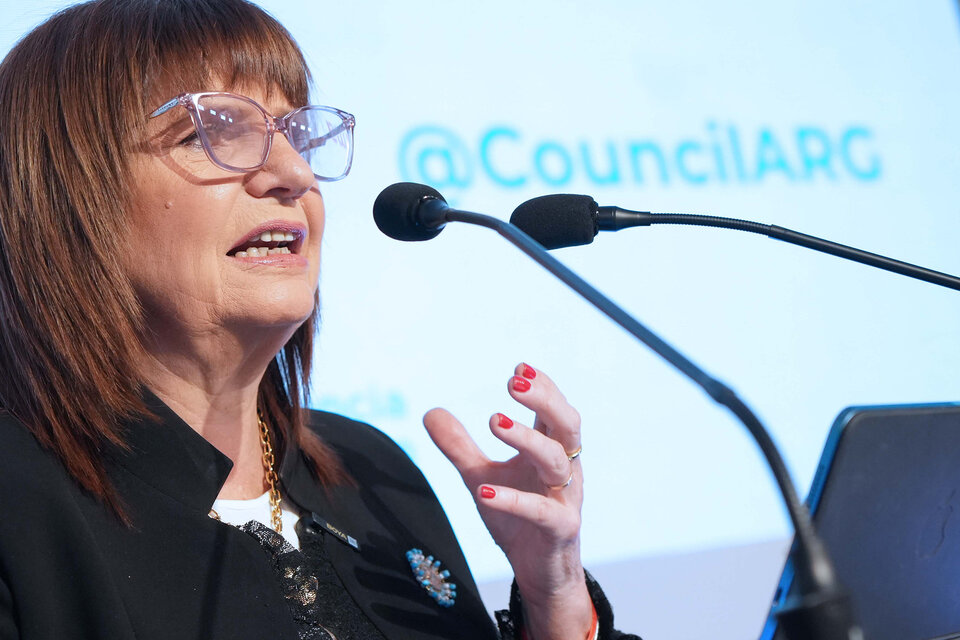

In [144]:
from IPython.display import Image
Image(media_req.content)